In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.insert(0, '/home/mehdi/github/LSSutils')
import lssutils.utils as ut

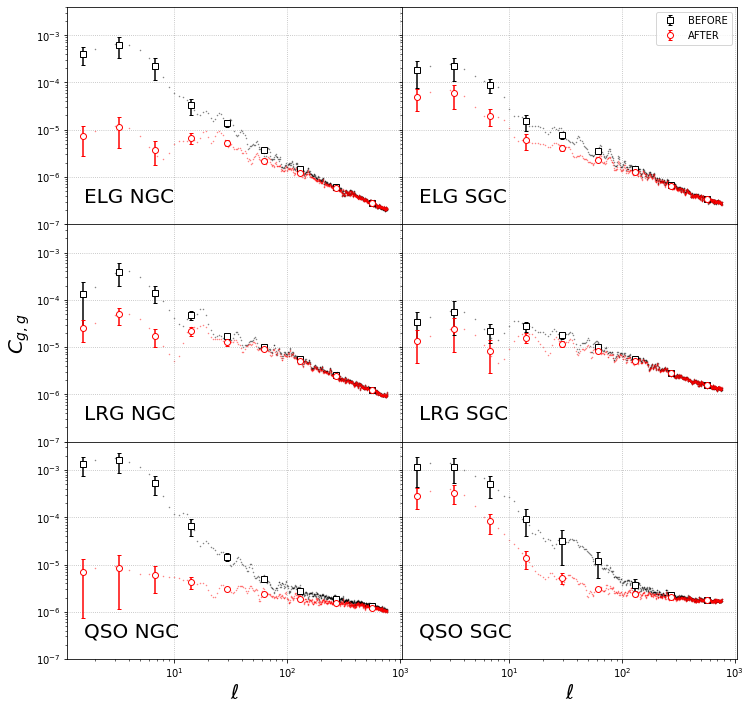

In [40]:
kind = 'elg'

c = {'before':'k', 'after':'r'}
mk = {'before':'s', 'after':'o'}


fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12), 
                       sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.0, hspace=0.0)

ax = ax.flatten()


for j,kind in enumerate(['elg', 'lrg', 'qso']):
    
    for ii, cap in enumerate(['N', 'S']):

        i = 2*j+ii
        cl = np.load(f'results/cl_{kind}_{cap}GC.npz', allow_pickle=True)

        for s in ['before', 'after']:
            c_ = cl[s].item()['cl_gg']['cl']
            c_j = cl[s].item()['cl_gg']
            l_, c_b, c_e = ut.histogram_cell(c_j, return_err=True, method='jackknife')

            ax[i].scatter(np.arange(c_.size), c_, 1, color=c[s], 
                        marker='.', alpha=0.5)
            ax[i].errorbar(l_, c_b, c_e, color=c[s], 
                         marker=mk[s], ls='None', 
                         mfc='w', label=s.upper(),
                        capsize=2)
        ax[i].text(0.05, 0.1, f'{kind.upper()} {cap}GC', transform=ax[i].transAxes, fontsize=20)
        ax[i].grid(True, ls=':', color='grey', alpha=0.6)
    
ax[0].set(ylim=(1.0e-7, 4.0e-3), yscale='log', xscale='log')
ax[1].legend()

for i in [4, 5]:
    ax[i].set_xlabel(r'$\ell$', fontsize=20)
ax[2].set_ylabel(r'$C_{g,g}$', fontsize=20)
fig.savefig('results/cl.png', dpi=300, bbox_inches='tight')

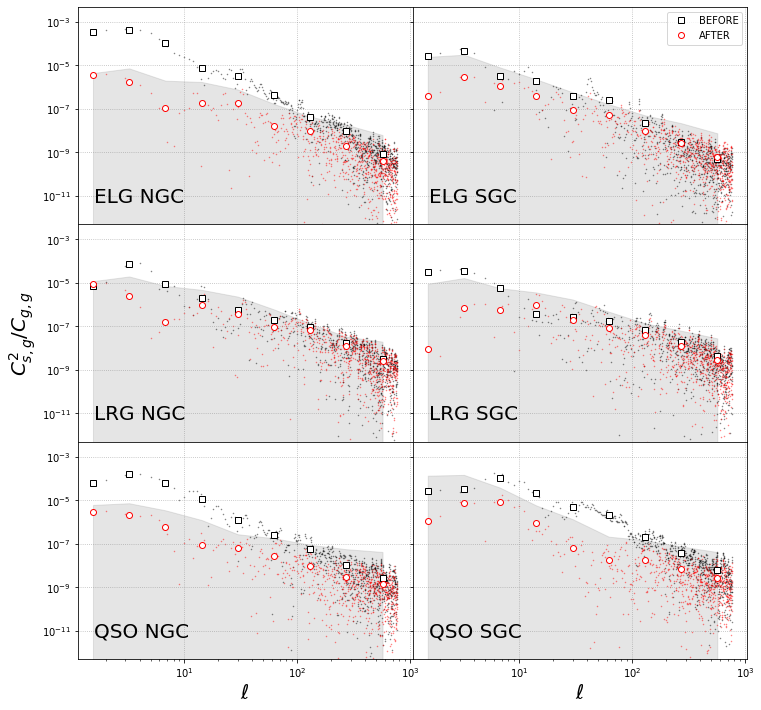

In [62]:

c = {'before':'k', 'after':'r'}
mk = {'before':'s', 'after':'o'}


fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12), 
                       sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.0, hspace=0.0)

ax = ax.flatten()


for j,kind in enumerate(['elg', 'lrg', 'qso']):
    
    for ii, cap in enumerate(['N', 'S']):

        i = 2*j+ii
        cl = np.load(f'results/cl_{kind}_{cap}GC.npz', allow_pickle=True)

        for s in ['before', 'after']:
            
            c_sg = cl[s].item()['cl_sg'][1]['cl']
            c_ss = cl[s].item()['cl_ss'][1]['cl']
            
            c_gg = cl[s].item()['cl_gg']
            _, _, c_e = ut.histogram_cell(c_gg, return_err=True, method='jackknife')

            

            c_j = c_sg*c_sg/(c_ss)

            l_, c_b = ut.histogram_cell(c_j)


            ax[i].scatter(np.arange(c_.size), c_j, 1, color=c[s], 
                        marker='.', alpha=0.5)
            ax[i].plot(l_, c_b, color=c[s], 
                         marker=mk[s], ls='None', 
                         mfc='w', label=s.upper())
            
            if s == 'after':
                ax[i].fill_between(l_, 1.0e-16, c_e, color='grey', zorder=-10, alpha=0.2)
            
        ax[i].text(0.05, 0.1, f'{kind.upper()} {cap}GC', transform=ax[i].transAxes, fontsize=20)
        ax[i].grid(True, ls=':', color='grey', alpha=0.6)
    
ax[0].set(ylim=(5.0e-13, 5.0e-3), yscale='log', xscale='log')
ax[1].legend()

for i in [4, 5]:
    ax[i].set_xlabel(r'$\ell$', fontsize=20)
ax[2].set_ylabel(r'$C^{2}_{s,g}/C_{g,g}$', fontsize=20)
fig.savefig('results/cl_ebv.png', dpi=300, bbox_inches='tight')

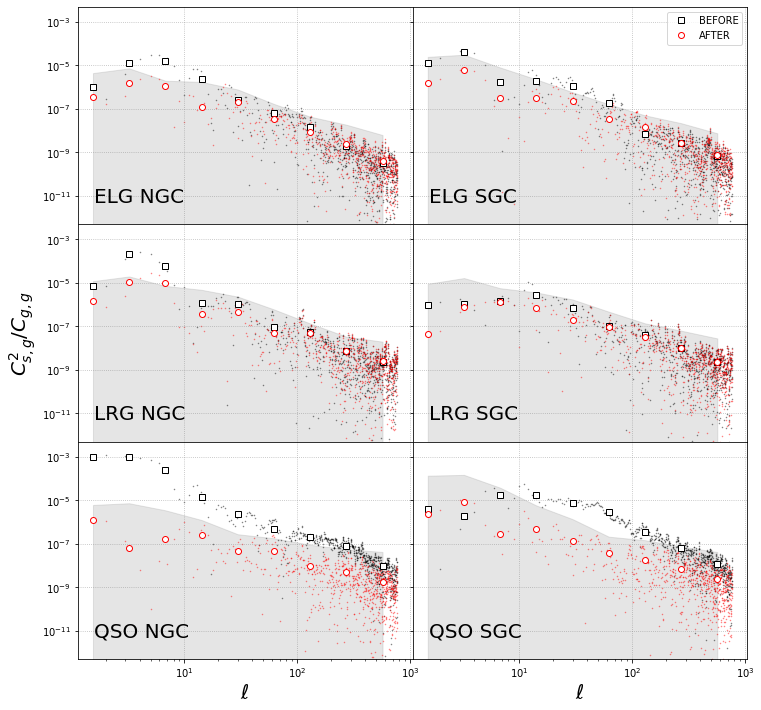

In [5]:
c = {'before':'k', 'after':'r'}
mk = {'before':'s', 'after':'o'}


fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12), 
                       sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.0, hspace=0.0)

ax = ax.flatten()


for j,kind in enumerate(['elg', 'lrg', 'qso']):
    
    for ii, cap in enumerate(['N', 'S']):

        i = 2*j+ii
        cl = np.load(f'results/cl_{kind}_{cap}GC.npz', allow_pickle=True)

        for s in ['before', 'after']:
            
            c_sg = cl[s].item()['cl_sg'][7]['cl']
            c_ss = cl[s].item()['cl_ss'][7]['cl']
            
            c_gg = cl[s].item()['cl_gg']
            _, _, c_e = ut.histogram_cell(c_gg, return_err=True, method='jackknife')

            

            c_j = c_sg*c_sg/(c_ss)

            l_, c_b = ut.histogram_cell(c_j)


            ax[i].scatter(np.arange(c_j.size), c_j, 1, color=c[s], 
                        marker='.', alpha=0.5)
            ax[i].plot(l_, c_b, color=c[s], 
                         marker=mk[s], ls='None', 
                         mfc='w', label=s.upper())
            
            if s == 'after':
                ax[i].fill_between(l_, 1.0e-16, c_e, color='grey', zorder=-10, alpha=0.2)
            
        ax[i].text(0.05, 0.1, f'{kind.upper()} {cap}GC', transform=ax[i].transAxes, fontsize=20)
        ax[i].grid(True, ls=':', color='grey', alpha=0.6)
    
ax[0].set(ylim=(5.0e-13, 5.0e-3), yscale='log', xscale='log')
ax[1].legend()

for i in [4, 5]:
    ax[i].set_xlabel(r'$\ell$', fontsize=20)
ax[2].set_ylabel(r'$C^{2}_{s,g}/C_{g,g}$', fontsize=20)
fig.savefig('results/cl_gdepthz.png', dpi=300, bbox_inches='tight')